<a href="https://colab.research.google.com/github/rajpatil7322/CNNPROJECTS/blob/master/Plant_Disease_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shutil
shutil.unpack_archive("/content/drive/My Drive/Colab Notebooks/plantdisease.zip","/content/sample_data")


In [ ]:
import os
train_dir="/content/sample_data/plantvillage/PlantVillage"
os.listdir(train_dir)

['Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato_Septoria_leaf_spot',
 'Potato___Late_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Bacterial_spot',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Pepper__bell___healthy',
 'Tomato_Early_blight',
 'Potato___healthy',
 'Tomato_Late_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite']

In [ ]:
images=train_dir+'/Tomato__Target_Spot'
os.listdir(images)

['f845fbab-129e-489a-b5b4-ba7a14679972___Com.G_TgS_FL 1130.JPG',
 'ab7126ed-6e91-4175-b552-e26756c54b3e___Com.G_TgS_FL 8341.JPG',
 '4877b5f3-e026-4de3-a167-42350a40f28b___Com.G_TgS_FL 9826.JPG',
 '87b6a20f-1b39-4696-a2a7-5fdcf5dbc4f5___Com.G_TgS_FL 1014.JPG',
 '326f1d4e-e38a-4b91-8e92-31e43484e787___Com.G_TgS_FL 8394.JPG',
 '67428adc-ca72-4ad8-b042-2663d6efb864___Com.G_TgS_FL 1127.JPG',
 '6a48c56c-2110-44f9-9f8e-3fa23117d5d2___Com.G_TgS_FL 8123.JPG',
 'bead2136-5e70-423c-8988-ea87a89148f1___Com.G_TgS_FL 1082.JPG',
 '312117bf-d6f3-41a0-8dd8-50a221e61d87___Com.G_TgS_FL 8293.JPG',
 '7f046d39-6da1-4c04-a3e9-561421a49a11___Com.G_TgS_FL 1023.JPG',
 '59334a76-8e36-4c68-bd5e-4b181b710305___Com.G_TgS_FL 9778.JPG',
 '4ec88bab-c631-438f-84dd-1645e7312905___Com.G_TgS_FL 0683.JPG',
 '0ed61d9f-3301-4088-a020-ccc9ebed8b21___Com.G_TgS_FL 8399.JPG',
 'f5effe3b-b2c1-47c5-be33-615f4233823a___Com.G_TgS_FL 0877.JPG',
 'd14316d2-f733-4b05-933e-bb29ab3af867___Com.G_TgS_FL 1128.JPG',
 '3f56fdf7-aa72-42e5-9add

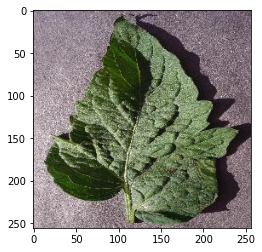

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
Images=images+'/76cefc70-6454-4dd0-bd4d-fddb3d129bed___Com.G_TgS_FL 1057.JPG'
plt.imshow(imread(Images))

In [ ]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Train_dir='/content/sample_data/plantvillage/PlantVillage'
Test_dir='/content/sample_data/PlantVillage'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_Size=200

image_gen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_Size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(100,100),
                                                           class_mode='categorical')

Found 20638 images belonging to 15 classes.


In [ ]:
test_data_gen=image_gen.flow_from_directory(batch_size=batch_Size,
                                                           directory=train_dir,
                                                           target_size=(100,100),
                                                           class_mode='categorical')

Found 20638 images belonging to 15 classes.


In [ ]:
test_data_gen.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [ ]:
train_data_gen[0][0].shape

(200, 100, 100, 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization
from keras import regularizers

In [ ]:
import tensorflow as tf
import keras

In [ ]:
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (100,100,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(15, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()

MODEL CREATED
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 33, 33, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 

In [ ]:
epochs=15
total_train=20638

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_Size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_train // batch_Size
)

Epoch 1/15
103/103 [==============================] - 131s 1s/step - loss: 1.9872 - accuracy: 0.5319 - val_loss: 2.9757 - val_accuracy: 0.2253
Epoch 2/15
103/103 [==============================] - 131s 1s/step - loss: 1.2422 - accuracy: 0.7017 - val_loss: 2.6073 - val_accuracy: 0.2895
Epoch 3/15
103/103 [==============================] - 130s 1s/step - loss: 0.9556 - accuracy: 0.7734 - val_loss: 2.0454 - val_accuracy: 0.4809
Epoch 4/15
103/103 [==============================] - 131s 1s/step - loss: 0.8075 - accuracy: 0.8042 - val_loss: 1.2669 - val_accuracy: 0.8382
Epoch 5/15
103/103 [==============================] - 132s 1s/step - loss: 0.6820 - accuracy: 0.8406 - val_loss: 1.2265 - val_accuracy: 0.6600
Epoch 6/15
103/103 [==============================] - 130s 1s/step - loss: 0.6042 - accuracy: 0.8598 - val_loss: 1.0565 - val_accuracy: 0.7009
Epoch 7/15
103/103 [==============================] - 131s 1s/step - loss: 0.5503 - accuracy: 0.8715 - val_loss: 0.8714 - val_accuracy: 0.7579

In [ ]:
losses=pd.DataFrame(model.history.history)

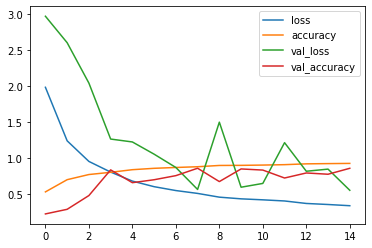

In [ ]:
losses.plot()

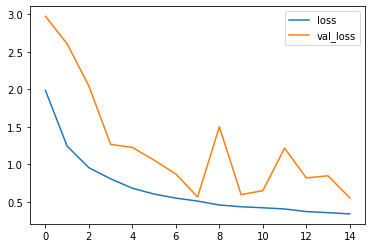

In [ ]:
losses[['loss','val_loss']].plot()

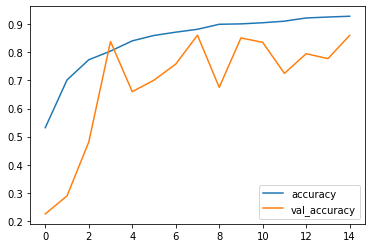

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
y_pred=model.predict(test_data_gen)

In [ ]:
y_pred

array([[7.2120824e-06, 9.9446541e-01, 3.2707792e-08, ..., 5.0725941e-07,
        6.5764966e-06, 5.1675370e-06],
       [5.2801358e-08, 5.8964784e-11, 9.8937768e-01, ..., 7.9101721e-19,
        4.4469409e-22, 4.9887467e-09],
       [2.4771640e-05, 5.7631524e-08, 4.2267610e-11, ..., 9.9995327e-01,
        4.9598675e-10, 5.9563548e-12],
       ...,
       [2.5108100e-08, 4.3690237e-04, 3.4583136e-05, ..., 2.2348059e-04,
        9.8332986e-09, 3.1991407e-05],
       [5.1569280e-08, 6.2026749e-07, 1.0461633e-09, ..., 8.3369977e-04,
        1.0248870e-03, 2.7936496e-06],
       [2.3697797e-02, 5.2532769e-08, 2.6248922e-04, ..., 2.2799476e-08,
        2.0871135e-10, 1.6920918e-11]], dtype=float32)

In [ ]:
os.listdir(Test_dir)

['Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato_Septoria_leaf_spot',
 'Potato___Late_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Bacterial_spot',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Pepper__bell___healthy',
 'Tomato_Early_blight',
 'Potato___healthy',
 'Tomato_Late_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite']

In [ ]:
test_image=Test_dir+'/Potato___Early_blight'

In [ ]:
os.listdir(test_image)

['16a6f216-6d2a-48fe-b8bc-ff385c96d0d3___RS_Early.B 7220.JPG',
 '85a9856f-d5ae-4740-a038-517489a25ff5___RS_Early.B 8635.JPG',
 '833c373e-d3fc-4d1e-86e7-8bd11d41a33e___RS_Early.B 7509.JPG',
 'a50c5f93-a5db-4eaf-9d82-2e420d2351e7___RS_Early.B 7060.JPG',
 'b549ab3b-06f1-45ef-bf34-86071552d870___RS_Early.B 8576.JPG',
 'b05850b8-bfb9-487d-b0ba-8f406eba933e___RS_Early.B 6936.JPG',
 '911b9166-40ba-4dc8-974e-c916e6866142___RS_Early.B 9089.JPG',
 'd9ebe6a0-d46e-47fe-950e-938f7ce83afb___RS_Early.B 7419.JPG',
 '41f4502c-34aa-45a5-b593-7191f7a62f96___RS_Early.B 8774.JPG',
 '7f0c3ad4-67f7-4a6e-81da-5cdbe1c5ff8b___RS_Early.B 8453.JPG',
 'e12f2cbd-6ced-45c5-8d83-96e19b92bfdd___RS_Early.B 8367.JPG',
 'fdc691b0-2b15-4cb6-8f5d-c4e5654389e0___RS_Early.B 7935.JPG',
 '53de9716-fcc5-4241-9e8d-21792a5cf226___RS_Early.B 9014.JPG',
 '1daae61a-7014-4efe-b855-018999a5be9b___RS_Early.B 6852.JPG',
 'b2b7758e-f201-4d9c-bc27-d53bb09b2dac___RS_Early.B 7025.JPG',
 '9bef32f0-dc02-4223-a378-6a41c6bfc7a9___RS_Early.B 844

In [ ]:
predict_image=test_image+'/26d2af6a-f52e-457c-8006-fa106ad39fbe___RS_Early.B 8586.JPG'

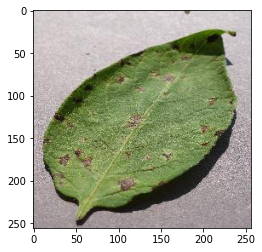

In [ ]:
plt.imshow(imread(predict_image))

In [ ]:
IMAGE=imread(predict_image)
IMAGE.shape

(256, 256, 3)

In [ ]:
raj=test_data_gen[0][0]
raj[0].shape

(100, 100, 3)

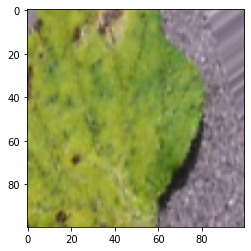

In [ ]:
RAJ=raj[4]
plt.imshow(RAJ)

In [ ]:
RAJ.shape

(100, 100, 3)

In [ ]:
RAJ=np.expand_dims(raj[4],axis=0)

In [ ]:
RAJ.shape

(1, 100, 100, 3)

In [ ]:
test_data_gen.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [ ]:
train_data_gen.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [ ]:
model.predict_classes(RAJ)

array([9])

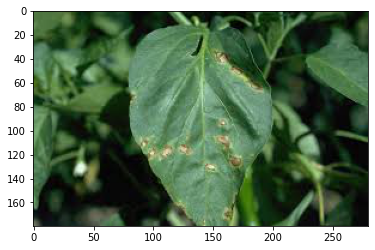

In [ ]:
raju='/content/drive/My Drive/Colab Notebooks/Pepper_bell_Bacterial.jpg'
RAJU=imread(raju)
plt.imshow(RAJU)

In [ ]:
from skimage.transform import resize
RAJU=resize(RAJU,(100,100))


In [ ]:
type(RAJU)

numpy.ndarray

In [ ]:
RAJU.shape

(100, 100, 3)

In [ ]:
RAJU=np.expand_dims(RAJU,axis=0)

In [ ]:
RAJU.shape

(1, 100, 100, 3)

In [ ]:
model.predict_classes(RAJU)

array([0])

In [ ]:
model.save('Plant_Disease.h5')